In [1]:
from time import time
from src.data_structures import *
from src.trapezoidal_map import *
from src.utils import *
from src.visualizer import *
import matplotlib.pyplot

In [14]:
import matplotlib.pyplot as plt
%matplotlib tk
mouse_points = []

def add_sections(event):
    x, y = event.xdata, event.ydata

    if x is not None and y is not None:
        if event.button == 1:
            mouse_points.append((x, y))
            plt.plot(x, y, "go")
            if len(mouse_points) % 2 == 0 and len(mouse_points) > 0:
                plt.plot([mouse_points[-2][0], mouse_points[-1][0]], [mouse_points[-2][1], mouse_points[-1][1]], 'b-')

            plt.draw()
        elif event.button == 3:
            plt.close()


fig, ax = plt.subplots()
ax.set_title("Left click to add points, right click to close the plot")

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

fig.canvas.mpl_connect('button_press_event', add_sections)

plt.show()

In [15]:
lines = []
for i in range(0, len(mouse_points) - 1, 2):
    x1, x2 = mouse_points[i][0], mouse_points[i + 1][0]
    if x1 < x2:
        lines.append((mouse_points[i], mouse_points[i + 1]))
    else:
        lines.append((mouse_points[i + 1], mouse_points[i]))

vis = Visualizer()
vis.add_line_segment(lines)
for line in lines:
    vis.add_point(line[0], color="blue")
    vis.add_point(line[1], color="blue")

vis.show()
print(lines)

[((np.float64(11.088709677419352), np.float64(7.088744588744589)), (np.float64(47.37903225806451), np.float64(23.051948051948056))), ((np.float64(36.69354838709677), np.float64(28.733766233766243)), (np.float64(72.1774193548387), np.float64(31.168831168831172))), ((np.float64(56.25), np.float64(12.500000000000004)), (np.float64(87.90322580645162), np.float64(26.839826839826845))), ((np.float64(62.903225806451616), np.float64(40.097402597402606)), (np.float64(92.33870967741935), np.float64(68.77705627705629))), ((np.float64(68.34677419354838), np.float64(69.5887445887446)), (np.float64(95.76612903225806), np.float64(93.12770562770564))), ((np.float64(56.04838709677419), np.float64(42.532467532467535)), (np.float64(78.62903225806451), np.float64(69.31818181818183))), ((np.float64(18.951612903225804), np.float64(30.357142857142865)), (np.float64(51.61290322580645), np.float64(58.22510822510823))), ((np.float64(2.620967741935484), np.float64(59.57792207792208)), (np.float64(28.830645161290

In [16]:
tm = TrapezoidalMap(lines)
tm.build_trapezoidal_map()
vis = tm.vis
vis.save_gif()

Czas budowania mapy trapezowej dla 10000 odcinków: 7.2650 s


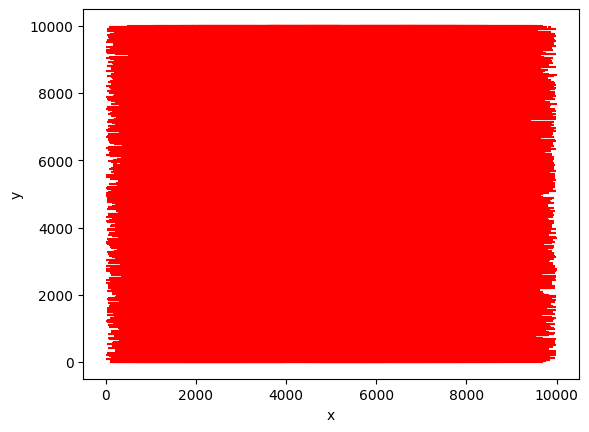

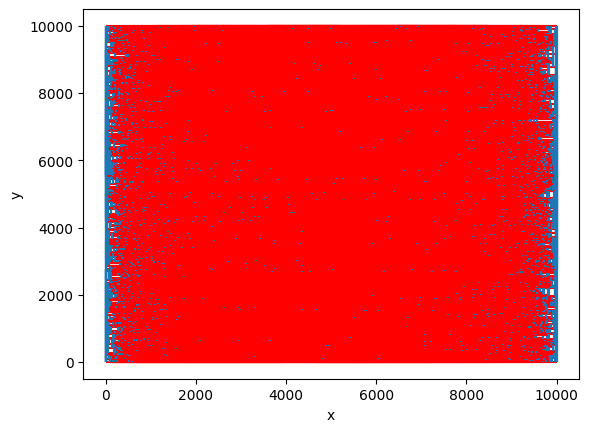

In [10]:
sizes = [10000]
import sys
sys.setrecursionlimit(1000000)
for size in sizes:
    generated_segments = generateParallelSegments(10000, 10000, size-2)
    vis = Visualizer()
    vis.add_line_segment(generated_segments, color='red')
    vis.show()
    t1 = time()
    T = TrapezoidalMap(generated_segments)
    T.build_trapezoidal_map()
    vis = T.vis
    vis.show()
    t2 = time()
    print("Czas budowania mapy trapezowej dla", size, "odcinków: {ex_time:.4f} s".format(ex_time = t2 - t1))